In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the input CSV files
input_files = [
    "../data/FARB_seismic_2023_2024.csv",
    "../data/JRSC_seismic_2023_2024.csv",
    "../data/LLNL_seismic_2023_2024.csv",
    "../data/ADAM_seismic_2023_2024.csv"
]

# Dictionary to hold each scaled column
scaled_data = {}

In [9]:
# Process each file
for file_path in input_files:
    # Load the data and keep only the 'amplitude_log' column
    df = pd.read_csv(file_path, usecols=['amplitude_log'])
    df['amplitude_log'] = df['amplitude_log'].fillna(0.5)
    # Calculate the mean of the amplitude_log column
    mean_value = df['amplitude_log'].mean()

    # Apply the custom scaling
    scaled_column = df['amplitude_log'].apply(
        lambda x: (x / mean_value) * 0.5 if x < mean_value else 0.5 + ((x - mean_value) / (1 - mean_value)) * 0.5
    )

    # Add the scaled column to the dictionary, using a concise name based on the filename
    column_name = file_path.split('/')[-1].replace('_seismic_2023_2024.csv', '')
    scaled_data[column_name] = scaled_column

# Merge all scaled columns into a single DataFrame
merged_df = pd.DataFrame(scaled_data)

In [10]:
merged_df.head()

,FARB,JRSC,LLNL,ADAM
0,0.476090,0.278743,0.276697,0.286562
1,0.476090,0.278743,0.276697,0.286562
2,0.476090,0.278743,0.276697,0.286562
3,0.486430,0.749395,0.499887,0.497935
4,0.485883,0.732017,0.498643,0.497949


In [11]:
# Adjust the "JRSC" column to have a min of 0.4 and a max of 0.6
if 'JRSC' in merged_df.columns:
    jrsc_min, jrsc_max = merged_df['JRSC'].min(), merged_df['JRSC'].max()
    merged_df['JRSC'] = merged_df['JRSC'].apply(lambda x: 0.4 + ((x - jrsc_min) / (jrsc_max - jrsc_min)) * 0.2)

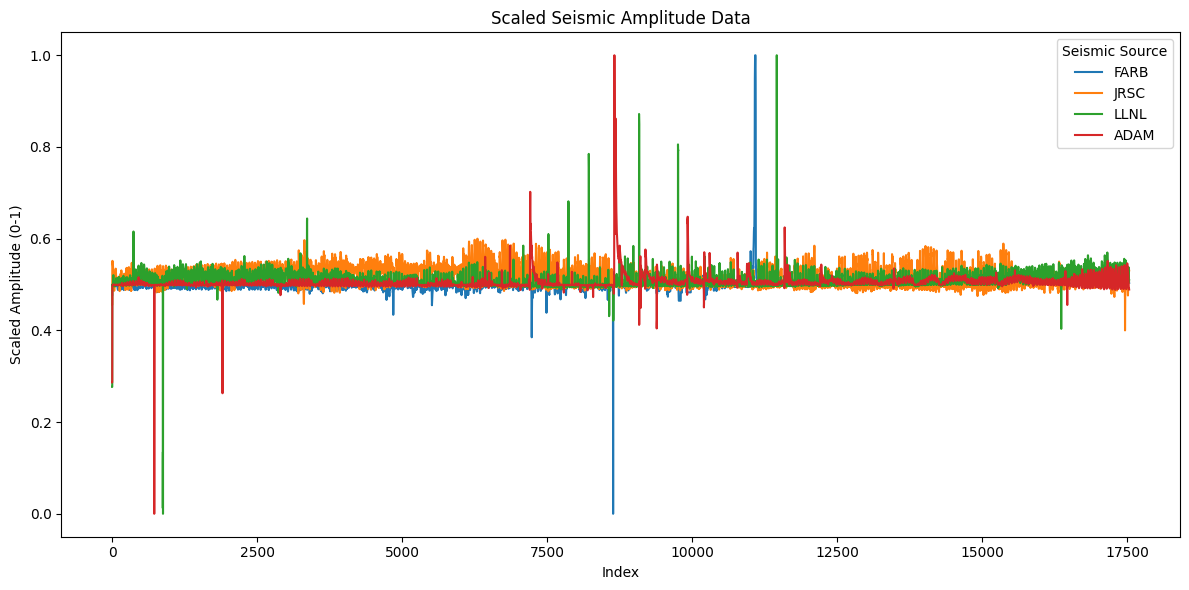

In [12]:
# Plot all four scaled columns with different colors
plt.figure(figsize=(12, 6))
for column in merged_df.columns:
    plt.plot(merged_df.index, merged_df[column], label=column)

# Add labels, title, and legend
plt.xlabel("Index")
plt.ylabel("Scaled Amplitude (0-1)")
plt.title("Scaled Seismic Amplitude Data")
plt.legend(title="Seismic Source")
plt.tight_layout()
plt.show()


In [13]:
# Save the merged DataFrame to a new CSV file
output_file = "../data/seismic_all.csv"
merged_df.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")

Processed data saved to ../data/seismic_all.csv
